# CS685: Assignment 2

## Importing Modules

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from functools import partial
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML

In [2]:
mpl.rc_file_defaults()

In [3]:
data = pd.read_csv("data/data.csv")

data["c"] = data["class"].astype("category")
del data["class"]

## Visualizing Data

In [4]:
data.groupby("c").count()

,x1,x2,x3
c,,,
0,25,25,25
1,5,5,5
2,8,8,8
3,6,6,6
4,18,18,18
5,5,5,5
6,5,5,5
7,6,6,6
8,5,5,5


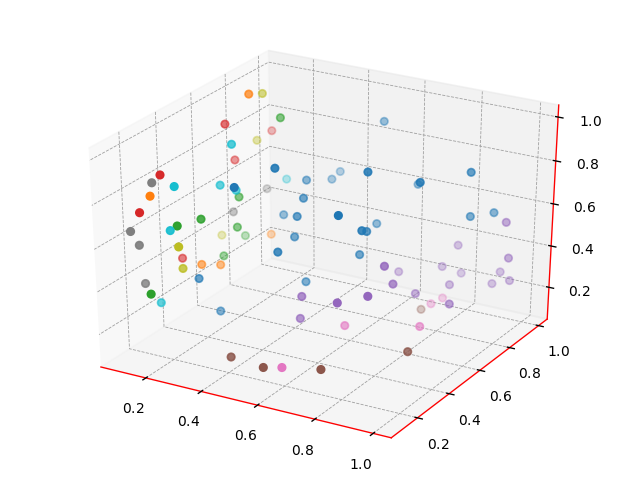

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    data_c = data[data.c == i]

    ax.scatter(data_c.x1, data_c.x2, data_c.x3)
plt.show()

## Classification

In [6]:
data_tr = data.sample(frac=1)

X = data_tr[["x1", "x2", "x3"]]
Y = data_tr["c"]

tr = 70

X_tr = X[:tr]
Y_tr = Y[:tr]

X_ts = X[tr:]
Y_ts = Y[tr:]

### MLP Classifier

In [7]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(20, 50, 100),
    activation="relu",
    batch_size=min(100, tr),
    max_iter=5000
)

### SVC

In [8]:
from sklearn.svm import SVC

svc_classifier = SVC(
    C=1000.0,
    gamma="auto"
)

### Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(
    max_depth=5
)

### Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    max_depth=5,
    n_estimators=100
)

### AdaBoost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100
)

### Gaussian Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()

###  Gradient Boosting Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(
    n_estimators=100
)

###  Extra Trees Classifier

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier(n_estimators=500)

### Voting Classifier

In [15]:
from sklearn.ensemble import VotingClassifier

classifier = VotingClassifier(
    estimators=[
        ("mlp", mlp_classifier),
        ("svc", svc_classifier),
        ("ada", ada_classifier),
        ("gnb", gnb_classifier),
        ("gb", gb_classifier),
        ("et", et_classifier),
        ("dt", dt_classifier),
        ("rf", rf_classifier),
    ],
    voting="hard"
)

In [16]:
classifier.fit(X_tr, Y_tr)

VotingClassifier(estimators=[('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size=70, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 50, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_ch...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [17]:
classifier.score(X_ts, Y_ts)

0.85